# LOESS

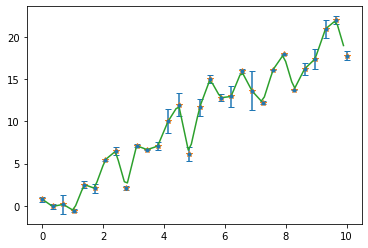

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import numpy as np
import statsmodels.api as sm


x = np.linspace(0,10,30)
y = np.linspace(0,20,30)+np.random.randn(1,30)[0]*2
y_err = np.reshape(np.random.randn(1,30),[1,len(y)])[0]
u = np.transpose(np.vstack([x,y]))
np.reshape(u,[np.shape(x)[0],2])


#lowess = sm.nonparametric.lowess(u[:,1], u[:,0], frac=.8)
lowess = sm.nonparametric.lowess(y, x, frac=0.1)
lowess_x = lowess[:,0]
lowess_y = lowess[:,1]

f = interp1d(lowess_x, lowess_y, bounds_error=False)
xnew = [i/10. for i in range(100)]
ynew = f(xnew)


#plt.plot(u[:,0],u[:,1] , 'o')
plt.errorbar(u[:,0],u[:,1],yerr=y_err, fmt='.',capsize=3)
#plt.fill_between(u[:,0],u[:,1]-y_err,u[:,1]+y_err)
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

In [3]:
print(x)
print(lowess_x)

[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]
[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


In [4]:
import statsmodels
lowess = sm.nonparametric.lowess(y, x, frac=.8, xvals=x, return_sorted=True)
print(lowess)
lowess = sm.nonparametric.lowess(y, x, frac=.8)
print(lowess)
statsmodels.nonparametric._smoothers_lowess.lowess(y, x, x, np.ones_like(x),frac=1, it=1, delta=0.0, given_xvals=False)[1]

[-0.9796528  -0.16205868  0.65712515  1.47673616  2.29588232  3.11442884
  3.93262607  4.75136316  5.57150509  6.39388125  7.22182827  8.06358735
  8.8604475   9.6321426  10.3712006  11.07448435 11.7520873  12.42150935
 13.0943963  13.7297599  14.36258918 14.98758724 15.60503198 16.21681459
 16.82435034 17.42847618 18.0307038  18.63289496 19.23664605 19.8422103 ]
[[ 0.         -0.9796528 ]
 [ 0.34482759 -0.16205868]
 [ 0.68965517  0.65712515]
 [ 1.03448276  1.47673616]
 [ 1.37931034  2.29588232]
 [ 1.72413793  3.11442884]
 [ 2.06896552  3.93262607]
 [ 2.4137931   4.75136316]
 [ 2.75862069  5.57150509]
 [ 3.10344828  6.39388125]
 [ 3.44827586  7.22182827]
 [ 3.79310345  8.06358735]
 [ 4.13793103  8.8604475 ]
 [ 4.48275862  9.6321426 ]
 [ 4.82758621 10.3712006 ]
 [ 5.17241379 11.07448435]
 [ 5.51724138 11.7520873 ]
 [ 5.86206897 12.42150935]
 [ 6.20689655 13.0943963 ]
 [ 6.55172414 13.7297599 ]
 [ 6.89655172 14.36258918]
 [ 7.24137931 14.98758724]
 [ 7.5862069  15.60503198]
 [ 7.93103448

array([0.94041697, 0.9997366 , 0.98945231, 0.88411173, 0.99955871,
       0.97017243, 0.94330592, 0.92337823, 0.73034624, 0.98137062,
       0.99638319, 0.98644649, 0.94709485, 0.82919372, 0.63926783,
       0.98259383, 0.71436187, 0.99026153, 0.99978422, 0.85715325,
       0.99054286, 0.82960394, 0.99146631, 0.92702542, 0.76968181,
       0.95589008, 0.98431942, 0.88890864, 0.84869969, 0.86133849])

# SIMEX


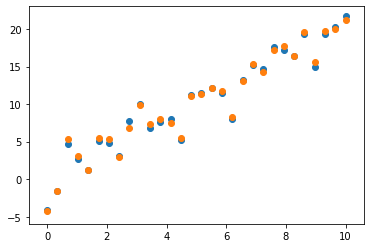

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#y =     [1   ,1.1  ,3   ,3.5]
#sigma = [0.2 ,0.3 ,0.2 ,0.1]
lam = [0.0,0.5,1.0,1.5,2.0]
#lam = np.linspace(0.0,2.0,21)



x = np.linspace(0,10,30)
y = np.linspace(0,20,30)+np.random.randn(1,30)[0]*2
y_err = np.reshape(np.random.randn(1,30),[1,len(y)])[0]


eta=np.zeros((len(lam),len(y)))
for ii in range(len(y)):
    for jj in range(len(lam)):
        eta[jj,ii]+=y[ii]+np.sqrt(lam[jj])*y_err[ii]
        
eta_simex = eta[:,1]


model = np.poly1d(np.polyfit(lam, eta_simex, 1))

#add fitted polynomial line to scatterplot
polyline = np.linspace(0, 2, 50)

#x=[0,1,2,3]

a=np.zeros((len(x),1))
for ii in range(len(y)):
    a[ii] += np.poly1d(np.polyfit(lam, eta[:,ii], 1))[0]-np.poly1d(np.polyfit(lam, eta[:,ii], 1))[1]+ np.poly1d(np.polyfit(lam, eta[:,ii], 1))[2]
    
plt.scatter(x,y)
plt.scatter(x,a)

 
-0.02596 x - 1.614


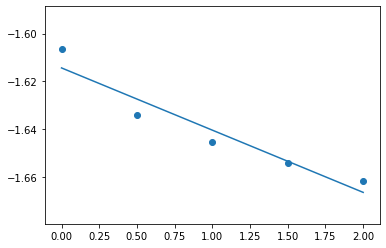

In [6]:
model = np.poly1d(np.polyfit(lam, eta_simex, 1))

#add fitted polynomial line to scatterplot
polyline = np.linspace(0, 2, 50)
plt.scatter(lam, eta_simex)
plt.plot(polyline, model(polyline))
print(model)
plt.show()

In [7]:
eta=np.zeros((len(lam),len(y)))
for ii in range(len(y)):
    for jj in range(len(lam)):
        eta[jj,ii]+=y[ii]+np.sqrt(lam[jj])*y_err[ii]

eta_vect = np.zeros((len(lam),len(y))) 
for jj in range(len(lam)):
    eta_vect[jj]+=y+np.sqrt(lam[jj])*y_err
    
print(eta)
print(eta_vect)

[[-4.17343468 -1.60659024  4.69089682  2.74816479  1.20265376  5.06702569
   4.7960702   3.1452692   7.72281884 10.06107974  6.77764275  7.61971114
   8.04329138  5.20981992 11.2759028  11.44308986 12.10096701 11.5144874
   8.0507089  13.25931875 15.27708126 14.679056   17.63098911 17.21359187
  16.35213177 19.32475882 14.8887091  19.32701296 20.26244916 21.69642706]
 [-4.07833977 -1.63401563  3.79233571  2.29083647  1.22130303  4.39393148
   4.04061801  3.40678787  9.11876536 10.27789247  5.9823343   7.01836882
   8.92949874  4.76185966 11.52977235 11.5274845  12.02560677 11.23437963
   7.62160084 13.54796156 15.08714694 15.20189623 18.186998   16.5101381
  16.16951253 18.87144042 13.71755533 18.65020456 20.7259413  22.34768419]
 [-4.03895017 -1.6453756   3.42013951  2.10140488  1.22902781  4.11512673
   3.72769947  3.51511245  9.69698534 10.36769924  5.65290675  6.76928467
   9.29657785  4.57630845 11.63492855 11.56244191 11.99439154 11.1183552
   7.44385847 13.66752133 15.00847357 1

# LOESS + SIMEX

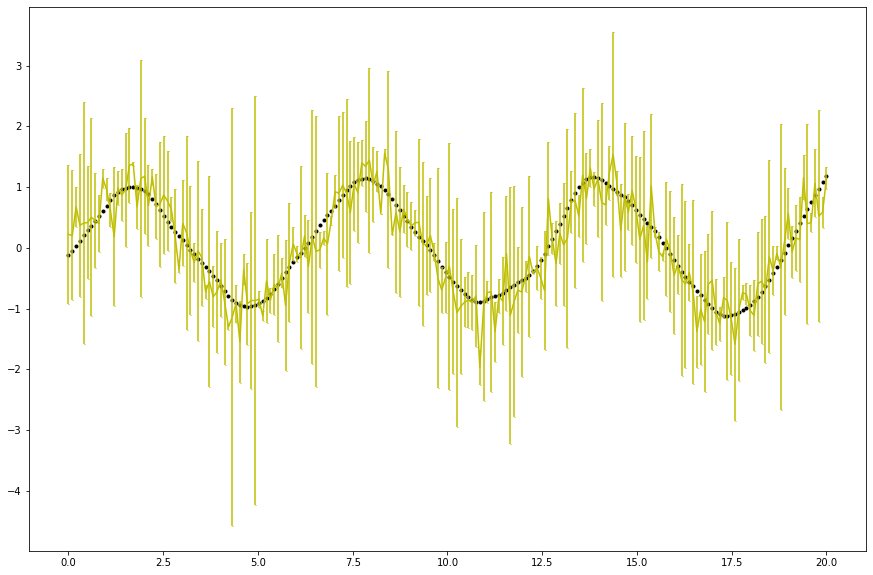

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import numpy as np
import statsmodels.api as sm


n_datos=200
x = np.linspace(0,20,n_datos)

#y = np.linspace(0,20,n_datos)+np.random.randn(1,n_datos)[0]
y = np.sin(x)+np.random.randn(1,n_datos)[0]*0.3
#y = np.exp(x)+np.random.randn(1,n_datos)[0]*0.5
y_err = np.reshape(np.random.randn(1,n_datos),[1,len(y)])[0]


def loess_simex(x_l, y_l, y_l_err, percentage=0.5, lam_l = [0.0,0.5,1.0,1.5,2.0],poly_grade=1):
    eta=np.zeros((len(lam_l),len(y_l)))
    for jj in range(len(lam_l)):
        eta[jj]+=y_l+np.sqrt(lam_l[jj])*y_l_err
        lowess = sm.nonparametric.lowess(eta[jj], x_l, frac=percentage)
        eta[jj] = lowess[:,1]
    a=np.zeros((len(x),1))
    for ii in range(len(y)):
        a[ii] += np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[0]-np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[1]+ np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[2]
    return a

plt.figure(figsize=(15,10))
plt.errorbar(x,y, yerr=y_err, capsize=0.5,ecolor='y',color='y')
plt.scatter(x,loess_simex(x,y,y_err,percentage=0.1,poly_grade=1), marker='.',color='k')

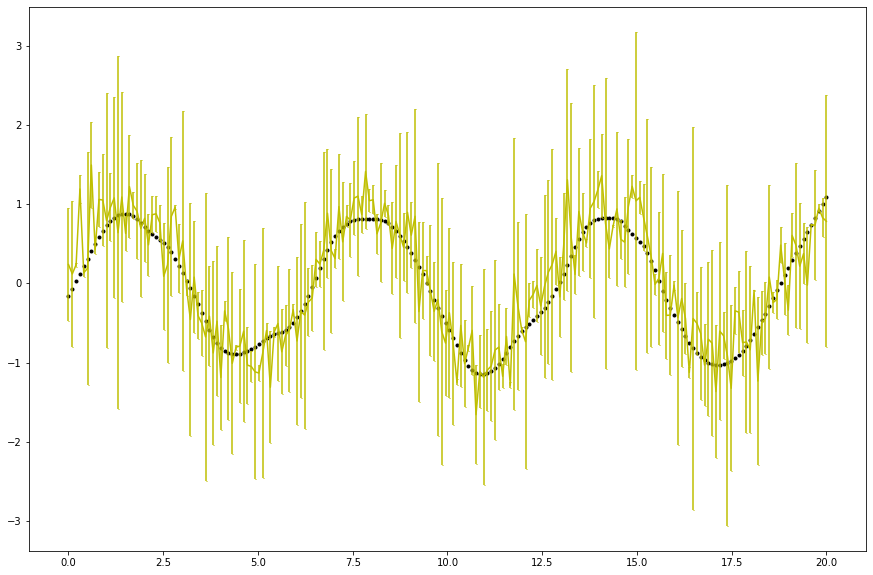

In [386]:
#lo mismo que arriba pero con otra funcion del mismo statsmodels, en lugar del statsmodels.api se usa
#statsmodels.nonparametric.smoothers_lowess.lowess

import statsmodels
def loess_simex2(x_l, y_l, y_l_err, percentage=0.5, lam_l = [0.0,0.5,1.0,1.5,2.0],poly_grade=1):
    eta=np.zeros((len(lam_l),len(y_l)))
    for jj in range(len(lam_l)):
        eta[jj]+=y_l+np.sqrt(lam_l[jj])*y_l_err
        lowess = statsmodels.nonparametric.smoothers_lowess.lowess(eta[jj], x_l, frac=percentage)
        eta[jj] = lowess[:,1]
    a=np.zeros((len(x),1))
    for ii in range(len(y)):
        a[ii] += np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[0]-np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[1]+ np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[2]
    return a

plt.figure(figsize=(15,10))
plt.errorbar(x,y, yerr=y_err, capsize=0.5,ecolor='y',color='y')
plt.scatter(x,loess_simex2(x,y,y_err,percentage=0.1,poly_grade=1), marker='.',color='k')

# Loess+Simex con barras de error (aun no)

[0.85171154 0.75152063 0.83655801 0.76886546 0.74262106 0.78589981
 0.49587274 0.93454909 0.88446603 0.89058987 0.99290845 0.94201984
 0.87667924 0.99585151 0.86960259 0.99475363 0.77017972 0.92753275
 0.95886016 0.99997516 0.97441404 0.9850506  0.91995206 0.88366315
 0.91898501 0.91034516 0.98836145 0.73062408 0.55750792 0.97869922
 0.82541006 0.99261705 0.84651089 0.96884573 0.9501481  0.93479784
 0.87377457 0.99738326 0.81607986 0.99999523 0.63765072 0.95416311
 0.99868723 0.88259287 0.98448373 0.99177402 0.98904435 0.91286585
 0.90430445 0.85899919 0.84106118 0.96717082 0.99541538 0.62467546
 0.99983027 0.9974961  0.8900861  0.96500079 0.96846031 0.99987764
 0.82354539 0.98150887 0.93808854 0.97372994 0.96584538 0.95588613
 0.99277405 0.96747388 0.70253368 0.99711488 0.99081463 0.78325044
 0.99997888 0.92937191 0.96698657 0.834795   0.83762199 0.97167648
 0.59492696 0.90159971 0.89265291 0.99540723 0.99291906 0.88223477
 0.94447948 0.98474067 0.93997849 0.98182721 0.99798129 0.7383

 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


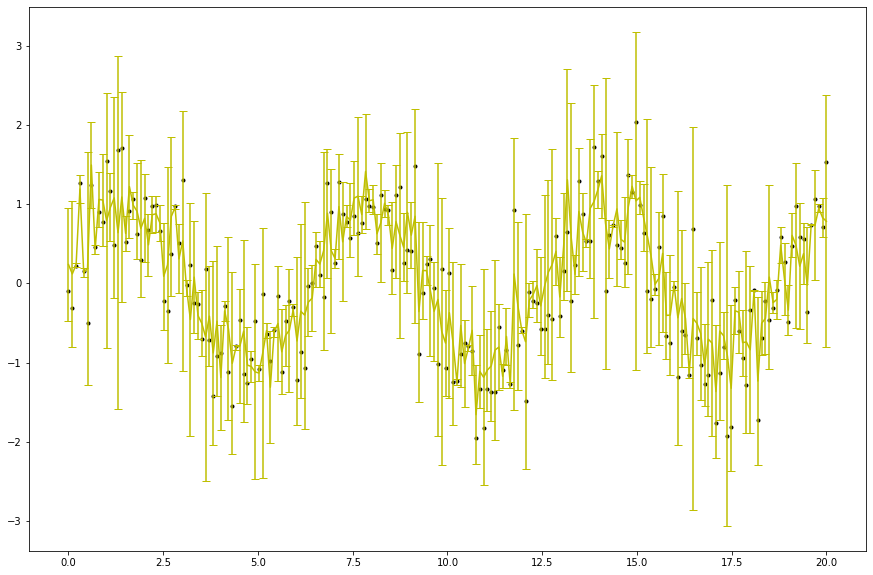

In [387]:
#lo mismo que arriba pero con otra funcion del mismo statsmodels, y esta si tiene errores

import statsmodels

def loess_simex_with_error(x_l, y_l, y_l_err, percentage=0.5, lam_l = [0.0,0.5,1.0,1.5,2.0],poly_grade=1):
    eta=np.zeros((len(lam_l),len(y_l)))
    errors = np.zeros((1,len(y_l)))
    for jj in range(len(lam_l)):
        eta[jj]+=y_l+np.sqrt(lam_l[jj])*y_l_err
        lowess = statsmodels.nonparametric._smoothers_lowess.lowess(eta[jj], x_l, x_l, np.ones_like(x_l),frac=percentage, it=1, delta=0.0, given_xvals=False)
        eta[jj] = lowess[0][:,1]
        print(lowess[1])
        errors += lowess[1]
    a=np.zeros((len(x),1))
    errors = errors/len(lam_l)
    for ii in range(len(y)):
        a[ii] += np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[0]-np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[1]+ np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[2]
    return a,errors

plt.figure(figsize=(15,10))
plt.errorbar(x,y, yerr=y_err, capsize=4,ecolor='y',color='y')
print(loess_simex_with_error(x,y,y_err,percentage=0.2,poly_grade=1)[1])
plt.scatter(x,loess_simex_with_error(x,y,y_err,percentage=0.001,poly_grade=1)[0], marker='.',color='k')

In [1]:
#lo mismo que arriba pero con otra funcion del mismo statsmodels, en lugar del statsmodels.api se usa
#statsmodels.nonparametric.smoothers_lowess.lowess

import statsmodels
def loess_simex3(x_l, y_l, y_l_err, percentage=0.5, lam_l = [0.0,0.5,1.0,1.5,2.0],poly_grade=1):
    eta=np.zeros((len(lam_l),len(y_l)))
    S = np.zeros((len(y_l),len(y_l)))
    for jj in range(len(lam_l)):
        eta[jj]+=y_l+np.sqrt(lam_l[jj])*y_l_err
        lowess = statsmodels.nonparametric.smoothers_lowess.lowess(eta[jj], x_l, frac=percentage, it=1)
        eta[jj] = lowess[:,1]
    a=np.zeros((len(x),1))
    for ii in range(len(y)):
        a[ii] += np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[0]-np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[1]+ np.poly1d(np.polyfit(lam_l, eta[:,ii], poly_grade))[2]
        
    return a

plt.figure(figsize=(15,10))
plt.errorbar(x,y, yerr=y_err, capsize=0.5,ecolor='y',color='y')
plt.scatter(x,loess_simex3(x,y,y_err,percentage=0.001,poly_grade=1), marker='.',color='k')

NameError: name 'plt' is not defined

In [400]:
dif = np.zeros((len(x),len(x)))
s = 0.1
s2 = np.floor(len(x)*s)
S = np.zeros((len(x),len(x)))
for ii in range(len(x)):
    dif[ii]+=abs(x-x[ii])
    for jj in range(int(s2)):
        S[ii,np.argsort(dif[ii])[jj]]+= (1-abs(dif[ii,np.argsort(dif[ii])[jj]]/dif[ii][np.argsort(dif[ii])[int(s2-1)]])**3)**3
   
        
    
    
    
    
    

    
print(S)    
#np.argmin(dif[1])

[[1.         0.99956268 0.99650503 ... 0.         0.         0.        ]
 [0.99948568 1.         0.99948568 ... 0.         0.         0.        ]
 [0.99512295 0.9993895  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.9993895  0.99512295]
 [0.         0.         0.         ... 0.99948568 1.         0.99948568]
 [0.         0.         0.         ... 0.99650503 0.99956268 1.        ]]


In [401]:
np.trace(2*S-np.matmul(S,np.transpose(S)))

-1521.6908131891068

In [402]:
len(x)

200

In [403]:
np.matmul(S,np.transpose(S))

array([[ 9.51235533,  9.7673037 , 10.00230963, ...,  0.        ,
         0.        ,  0.        ],
       [ 9.7673037 , 10.03699079, 10.28706192, ...,  0.        ,
         0.        ,  0.        ],
       [10.00230963, 10.28706192, 10.55273173, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 10.55273173,
        10.28706192, 10.00230963],
       [ 0.        ,  0.        ,  0.        , ..., 10.28706192,
        10.03699079,  9.7673037 ],
       [ 0.        ,  0.        ,  0.        , ..., 10.00230963,
         9.7673037 ,  9.51235533]])